# Logistic Regression with Titanic Dataset

In this project I have used Logistic Regression to predict the no of people survived in the titanic disaster.





Importing all the libraries required for Data manipulation and EDA

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline


In [60]:
#Importing the dataset

In [72]:
train=pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
#Checking the structure of DataFrame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

c:\users\k\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

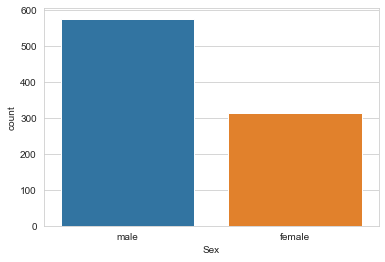

In [75]:
#Using seaborn for EDA

sns.countplot(train['Sex'])

Count of male was more compared to female

<AxesSubplot:xlabel='Age', ylabel='Count'>

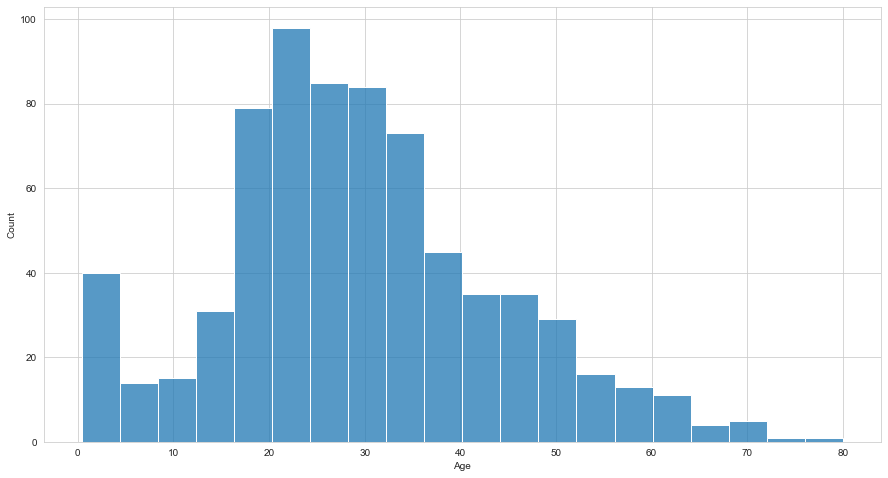

In [76]:
#Plotting a histplot to see the various age group of people

plt.figure(figsize=(15,8))
sns.histplot(train['Age'])

We could see that most of the people in ship were 20-30 age group

c:\users\k\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

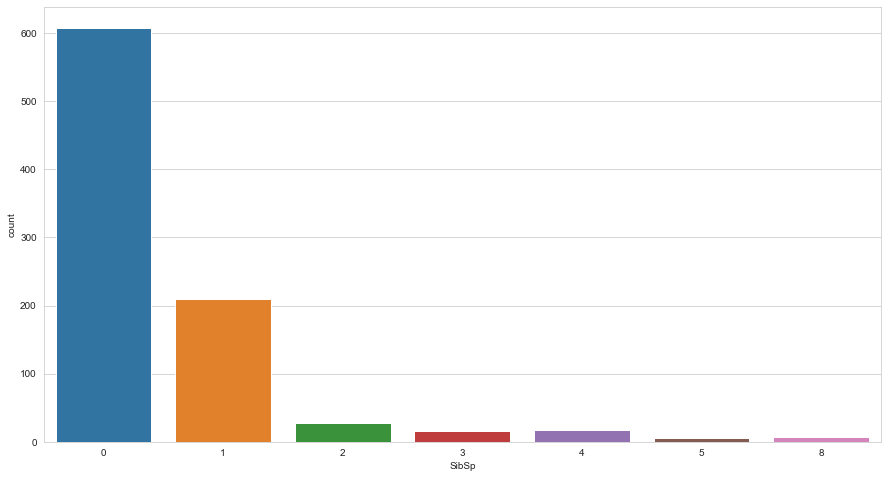

In [77]:
#Checking if people were alone.,or do they have siblings or spouse

plt.figure(figsize=(15,8))
sns.countplot(train['SibSp'])

Most of the people were alone

c:\users\k\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

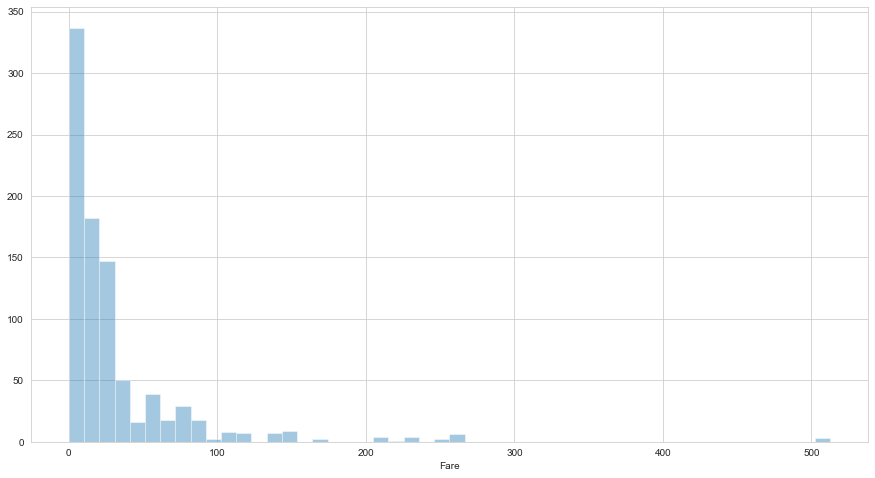

In [78]:
#Variation of Fare
plt.figure(figsize=(15,8))
sns.distplot(train['Fare'],kde=False)

Most of the fare was cheap

<AxesSubplot:>

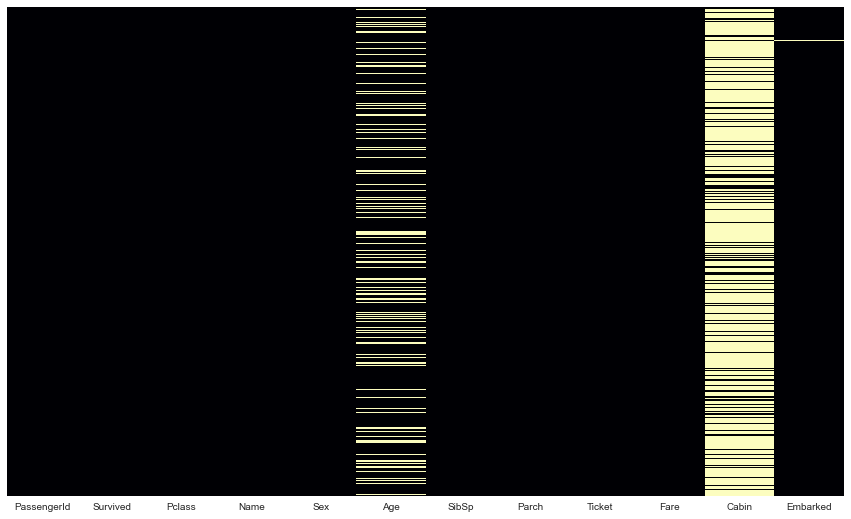

In [79]:
#Analysing  with heatmap

plt.figure(figsize=(15,9))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')

We could see that they were many missing values in Cabin.,and some in Age

# Data cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

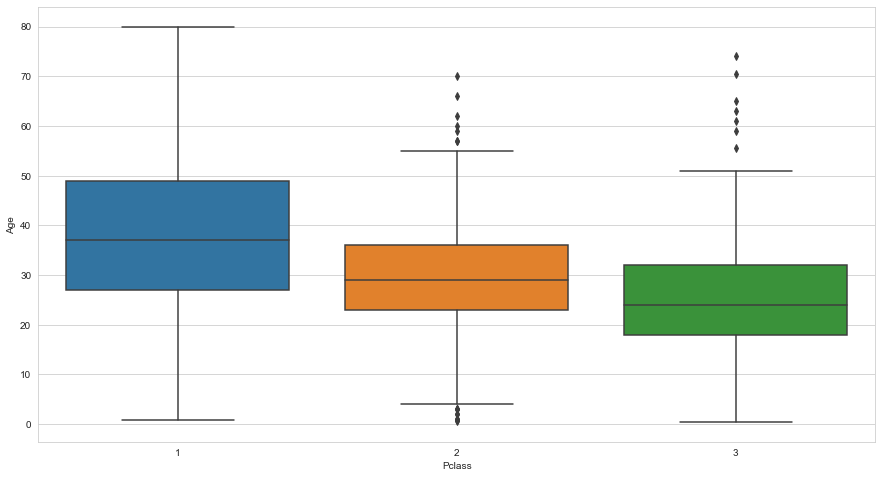

In [80]:
#We are now plotting boxplot to check average age value corresponding to each Pclass..,since that would be more accurate

plt.figure(figsize=(15,8))
sns.boxplot(x='Pclass',y='Age',data=train)

In [81]:
#Defining a function to substitute null value of age with some average value

def ageestimator(c):
    Age=c[0]
    Pclass=c[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Age


In [82]:
#Applying the function along the axis

train['Age']=train[['Age','Pclass']].apply(ageestimator,axis=1)

In [83]:
#Cross checking whether any value in Age is null

train['Age'].isnull().sum()

0

<AxesSubplot:>

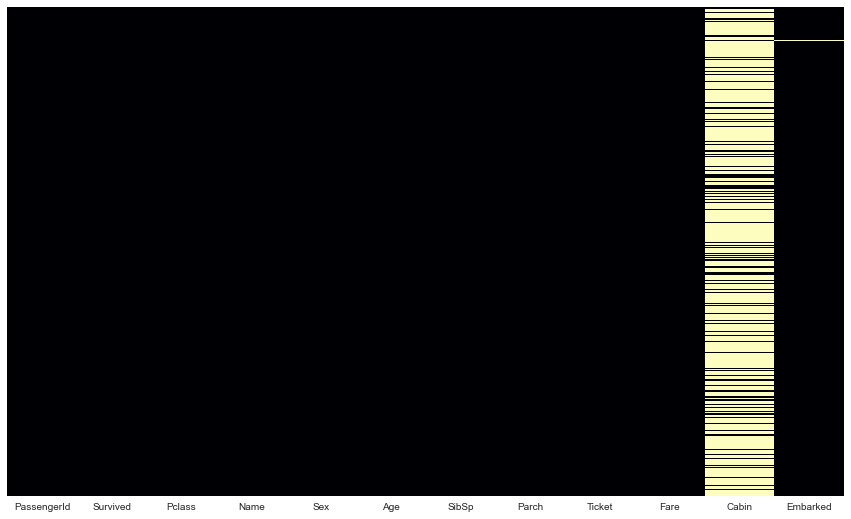

In [84]:
#Analysing with heatmap

plt.figure(figsize=(15,9))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [85]:
#We can drop Cabin column..,since too many NaN values

train.drop('Cabin',axis=1,inplace=True)

In [18]:
#We are dropping one row consisting of null embarked value

trai=train.dropna()

In [86]:
#Cross checking for any null value
trai.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [91]:
#Dropping the Text columns
trai.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

KeyError: "['PassengerId' 'Name' 'Ticket'] not found in axis"

In [21]:
trai.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [87]:
#Since we are passing this columns to Machine Learning Algorithm .,so for categorical variable like sex and embark we need to change into a dummy variable

sex=pd.get_dummies(trai['Sex'],drop_first=True)
embark=pd.get_dummies(trai['Embarked'],drop_first=True)

In [88]:
#Concatenating with our train column
trainew=pd.concat([trai,sex,embark],axis=1)
trainew.drop(['Sex','Embarked'],axis=1,inplace=True)

In [89]:
#Dropping Parch column since its of no use
trainew.drop('Parch',axis=1,inplace=True)

In [92]:
#Checking the new Dataframe
trainew

,Survived,Pclass,Age,SibSp,Fare,male,Q,S
0,0,3,22.0,1,7.2500,1,0,1
1,1,1,38.0,1,71.2833,0,0,0
2,1,3,26.0,0,7.9250,0,0,1
3,1,1,35.0,1,53.1000,0,0,1
4,0,3,35.0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,1,0,1
887,1,1,19.0,0,30.0000,0,0,1
888,0,3,25.0,1,23.4500,0,0,1
889,1,1,26.0,0,30.0000,1,0,0


# Machine Learning Part

Import sklearn library

In [93]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [94]:
#Passing X and Y variables

X=trainew[['Pclass','Age','SibSp','Fare','male','Q','S']]
Y=trainew['Survived']

In [28]:
#Splitting dataset into training and testing data 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=101,test_size=0.39)

In [29]:
#Calling the Algorithm

log=LogisticRegression()
log

LogisticRegression()

In [30]:
#Fitting wrt train data

log.fit(X_train,Y_train)

LogisticRegression()

In [95]:
#Predicting using test data

predict=log.predict(X_test)


In [96]:
#Checking classification report

classification_report(Y_test,predict,target_names=['CLASS 1','CLASS 2'])

'              precision    recall  f1-score   support\n\n     CLASS 1       0.82      0.89      0.85       213\n     CLASS 2       0.79      0.69      0.74       134\n\n    accuracy                           0.81       347\n   macro avg       0.81      0.79      0.80       347\nweighted avg       0.81      0.81      0.81       347\n'

<AxesSubplot:>

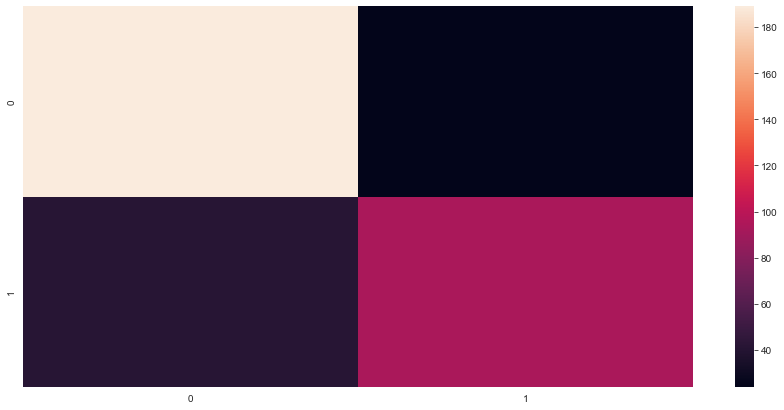

In [97]:
#Plotting confusion matrix

plt.figure(figsize=(15,7))
sns.heatmap(confusion_matrix(Y_test,predict))

In [99]:
#Checking accuracy of this model


accuracy_score(Y_test,predict)

0.8126801152737753

In [100]:
#Now we are repeating this for Kaggle uploading process,repeating same process


test=pd.read_csv('test.csv')
test.drop(['Name','Parch','Cabin'],axis=1,inplace=True)

<AxesSubplot:>

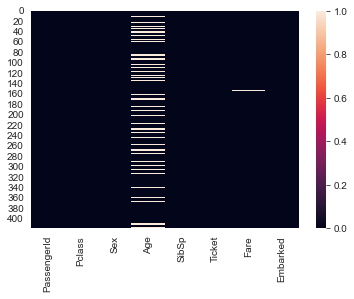

In [101]:
sns.heatmap(test.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

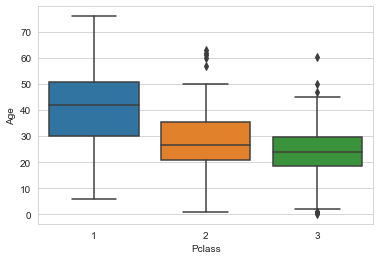

In [38]:
sns.boxplot(x='Pclass',y='Age',data=test)
    

In [102]:


def aged(g):
    Age=g[0]
    Pclass=g[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age
    
    
    

        

In [103]:
test['Age']=test[['Age','Pclass']].apply(aged,axis=1)

In [104]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Ticket,Fare,Embarked
0,892,3,male,34.5,0,330911,7.8292,Q
1,893,3,female,47.0,1,363272,7.0000,S
2,894,2,male,62.0,0,240276,9.6875,Q
3,895,3,male,27.0,0,315154,8.6625,S
4,896,3,female,22.0,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,24.0,0,A.5. 3236,8.0500,S
414,1306,1,female,39.0,0,PC 17758,108.9000,C
415,1307,3,male,38.5,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,male,24.0,0,359309,8.0500,S


In [105]:
#We are defining a function to replace age single value a particular number

def farenull(c):
    if pd.isnull(c):
        return 8.2
    else:
        return c

In [106]:
test['Fare']=test['Fare'].apply(farenull)


In [107]:
p=test

In [108]:
p

,PassengerId,Pclass,Sex,Age,SibSp,Ticket,Fare,Embarked
0,892,3,male,34.5,0,330911,7.8292,Q
1,893,3,female,47.0,1,363272,7.0000,S
2,894,2,male,62.0,0,240276,9.6875,Q
3,895,3,male,27.0,0,315154,8.6625,S
4,896,3,female,22.0,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,24.0,0,A.5. 3236,8.0500,S
414,1306,1,female,39.0,0,PC 17758,108.9000,C
415,1307,3,male,38.5,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,male,24.0,0,359309,8.0500,S


In [109]:
#Using same dummy variables

sex=pd.get_dummies(p['Sex'],drop_first=True)
embark=pd.get_dummies(p['Embarked'],drop_first=True)


In [110]:
#Concatenating the columns

testr=pd.concat([p,sex,embark],axis=1)

In [111]:
#Dropping all whatever not required

testr.drop(['Ticket'],axis=1,inplace=True)

In [112]:
testr.drop(['PassengerId','Sex','Embarked'],axis=1,inplace=True)

In [113]:
#Making into a dataset

df=pd.DataFrame({'PassengerId':p['PassengerId'],'Survived':log.predict(testr)})

In [114]:
#We have predicted with test data given in Kaggle

df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [332]:
#For uploading process
df.to_csv('submission',index=False)
